In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Load the data
df = pd.read_csv('east_texas_reservoir.csv')
df.drop(columns=['dead_pool_capacity', 'conservation_capacity', 'water_level'], inplace=True)
# set date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,surface_area,reservoir_storage,conservation_storage,percent_full
date,,,,
1999-03-05,280.1,2314,2314,29.3
1999-03-06,279.5,2308,2308,29.2
1999-03-07,278.6,2299,2299,29.1
1999-03-08,278.6,2299,2299,29.1
1999-03-09,278.9,2302,2302,29.1
...,...,...,...,...
2024-04-19,167.0,922,922,11.7
2024-04-20,167.8,928,928,11.7
2024-04-21,168.4,937,937,11.9


In [206]:
# create monthly dataframe and calculate monthly average
monthly = df.resample('M').mean()
monthly

,surface_area,reservoir_storage,conservation_storage,percent_full
date,,,,
1999-03-31,278.262963,2297.000000,2297.000000,29.074074
1999-04-30,270.310000,2223.966667,2223.966667,28.143333
1999-05-31,250.290323,2038.161290,2038.161290,25.803226
1999-06-30,277.320000,2299.233333,2299.233333,29.103333
1999-07-31,276.803226,2285.774194,2285.774194,28.929032
...,...,...,...,...
2023-12-31,194.629032,1282.806452,1282.806452,16.235484
2024-01-31,190.106452,1213.548387,1213.548387,15.367742
2024-02-29,185.282759,1144.103448,1144.103448,14.486207


# Data Analysis

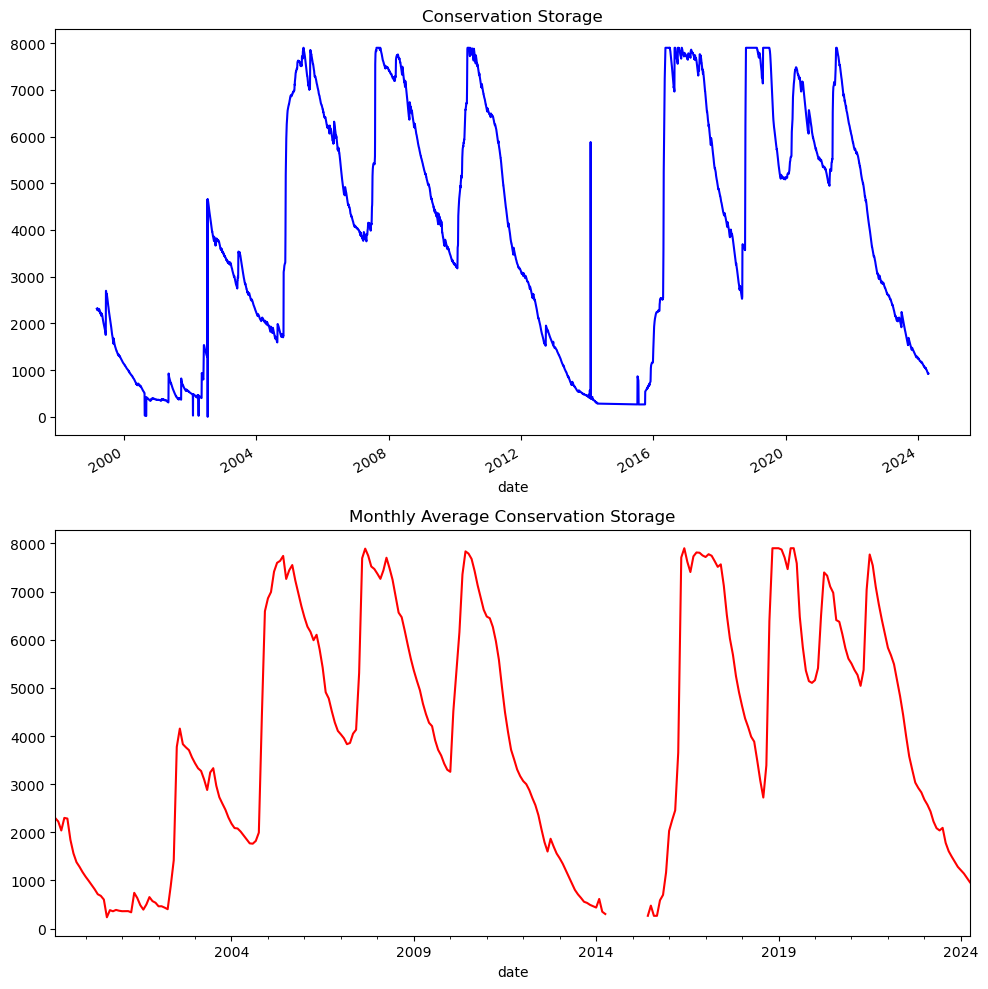

In [207]:
# Plot with 2 subplots of conservation storage, one with all data and one with monthly average
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
df['conservation_storage'].plot(ax=ax[0], color='blue')
monthly['conservation_storage'].plot(ax=ax[1], color='red')
ax[0].set_title('Conservation Storage')
ax[1].set_title('Monthly Average Conservation Storage')
plt.tight_layout()
plt.show()

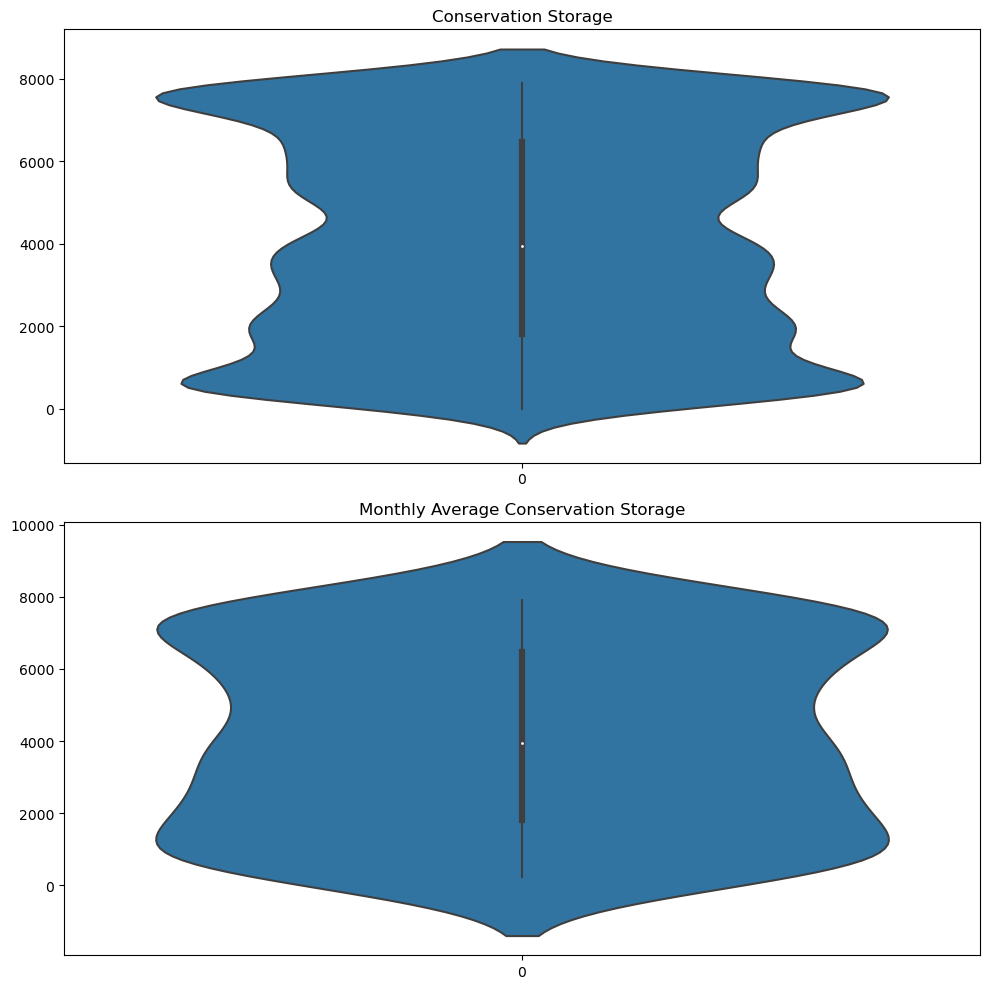

In [208]:
# plot with 2 violin subplots of conservation storage
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.violinplot(df['conservation_storage'], ax=ax[0])
sns.violinplot(monthly['conservation_storage'], ax=ax[1])
ax[0].set_title('Conservation Storage')
ax[1].set_title('Monthly Average Conservation Storage')
plt.tight_layout()
plt.show()

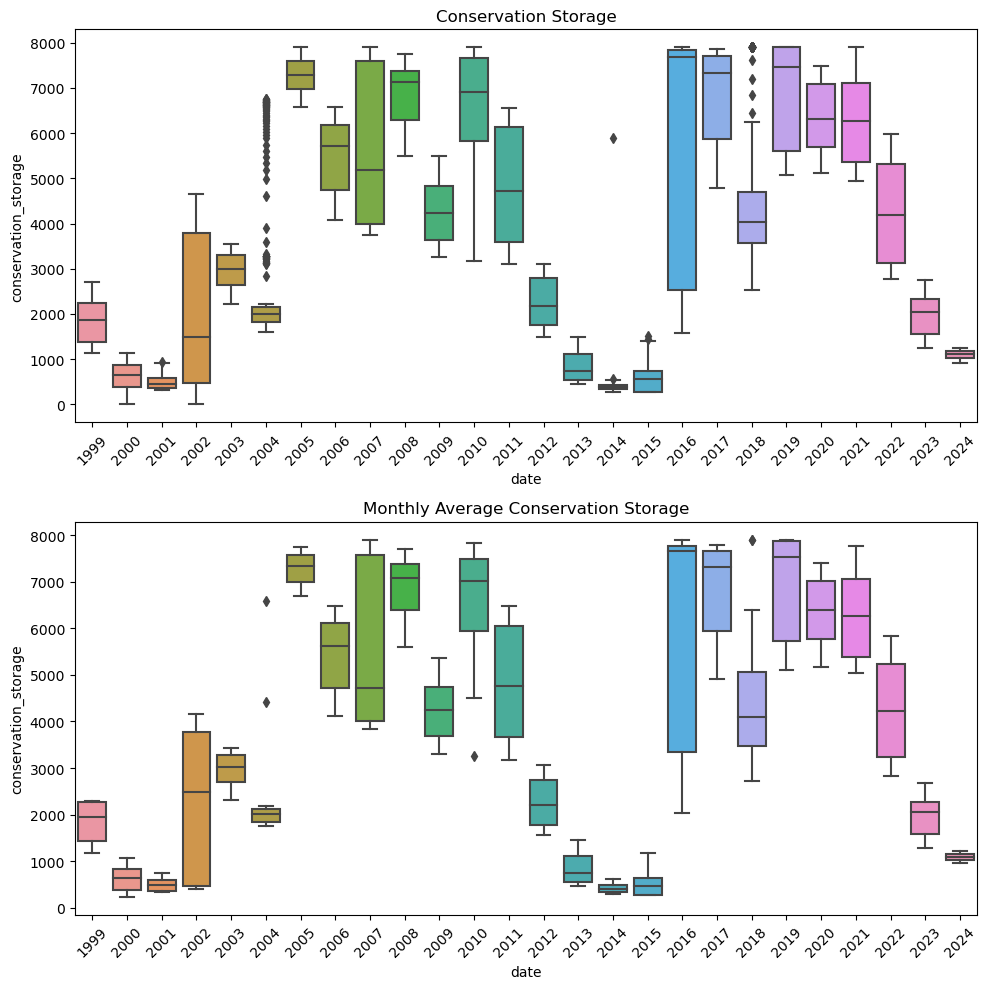

In [209]:
# box plot yearly with monthly average and all data
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.boxplot(x=df.index.year, y=df['conservation_storage'], ax=ax[0])
sns.boxplot(x=monthly.index.year, y=monthly['conservation_storage'], ax=ax[1])
ax[0].set_title('Conservation Storage')
ax[1].set_title('Monthly Average Conservation Storage')
# rotate x-axis labels
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

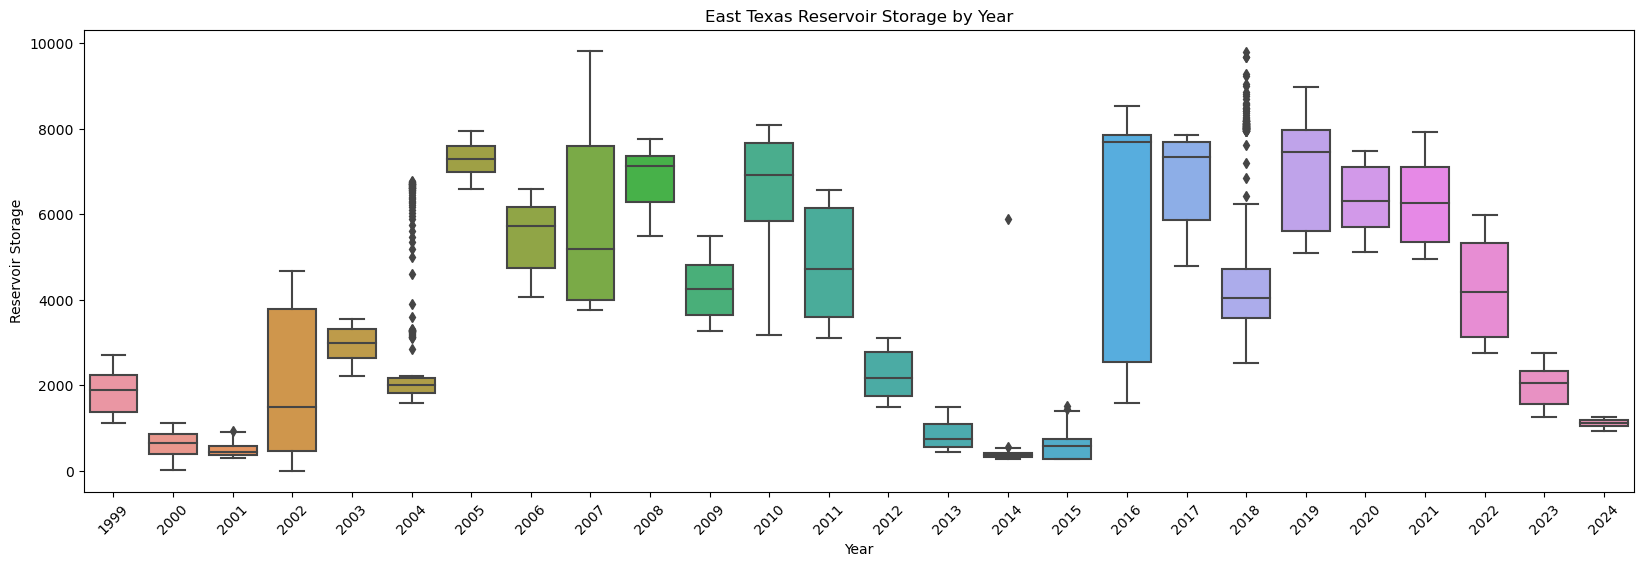

In [210]:
# box plot yearly
yearly_df = df.copy()
yearly_df['year'] = yearly_df.index.year
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='reservoir_storage', data=yearly_df)
plt.title('East Texas Reservoir Storage by Year')
plt.xlabel('Year')
plt.ylabel('Reservoir Storage')
plt.xticks(rotation=45)
plt.show()

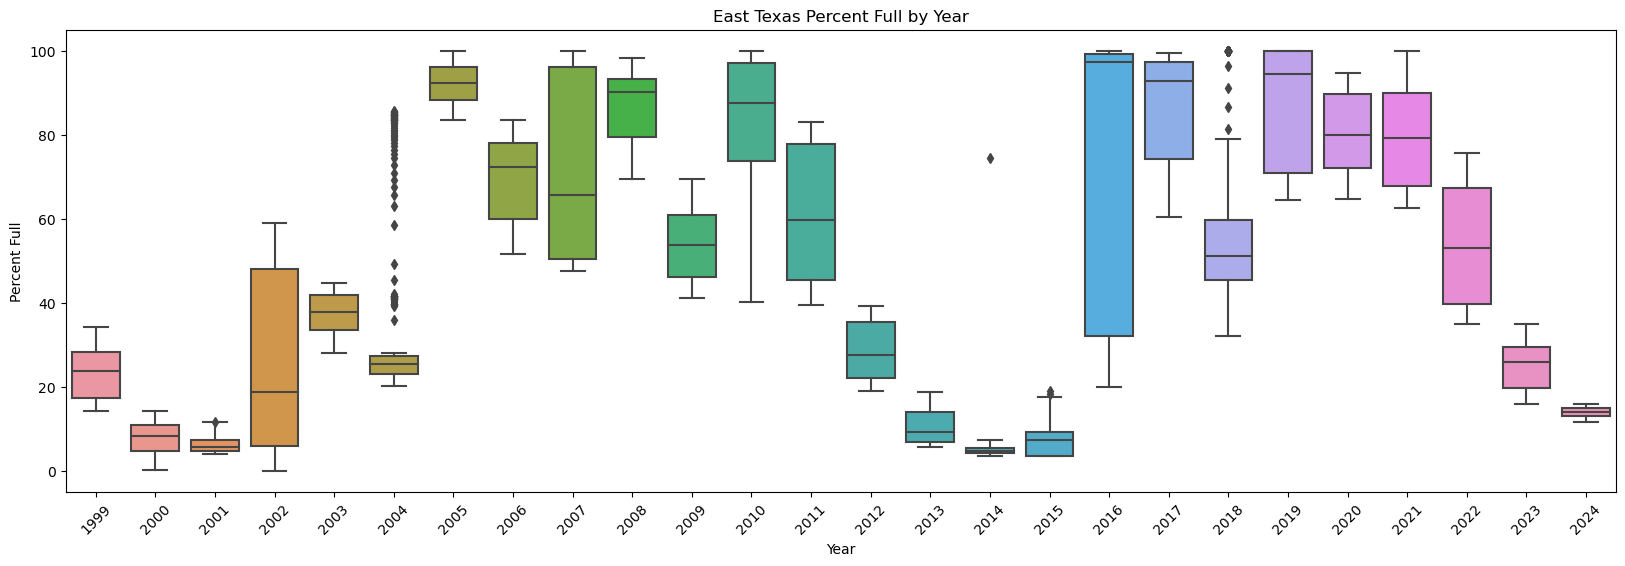

In [211]:
# box plot yearly
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='percent_full', data=yearly_df)
plt.title('East Texas Percent Full by Year')
plt.xlabel('Year')
plt.ylabel('Percent Full')
plt.xticks(rotation=45)
plt.show()

/Users/Khoi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

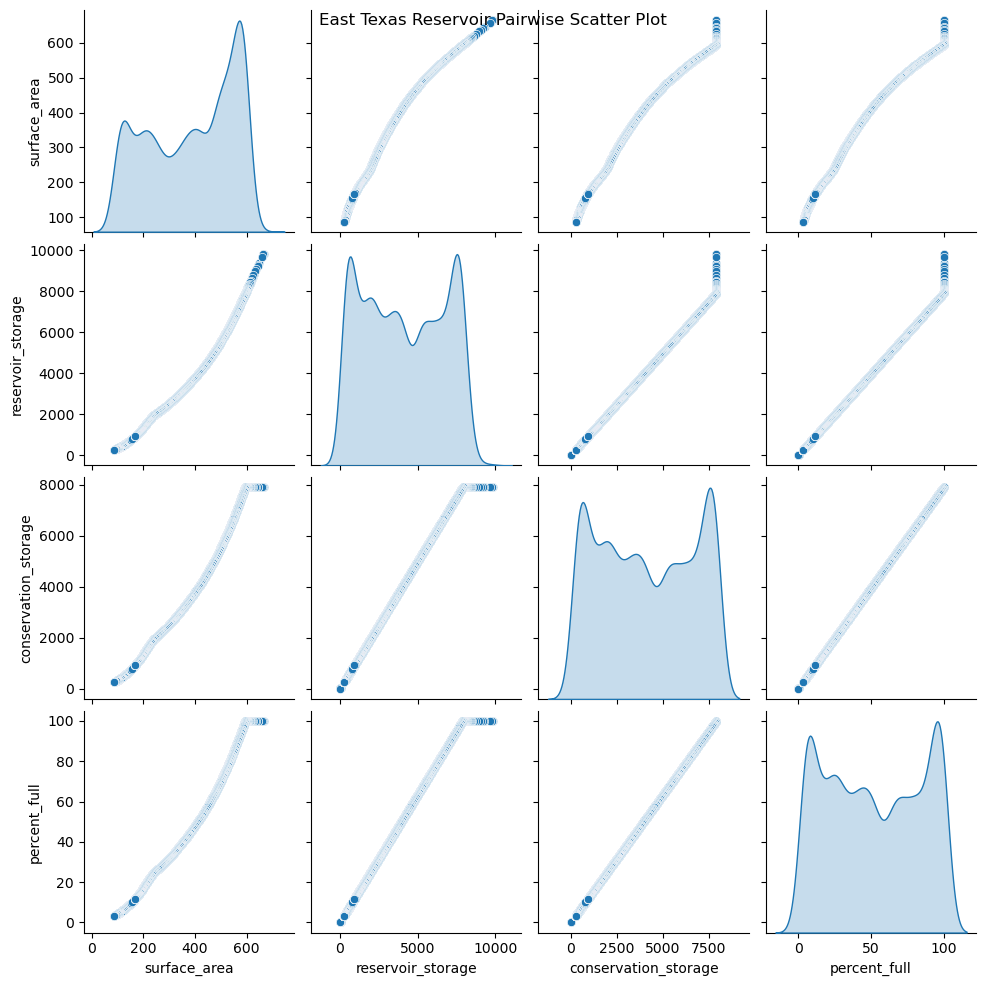

In [212]:
# pairwise scatter plot
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind='kde')
plt.suptitle('East Texas Reservoir Pairwise Scatter Plot')
plt.show()

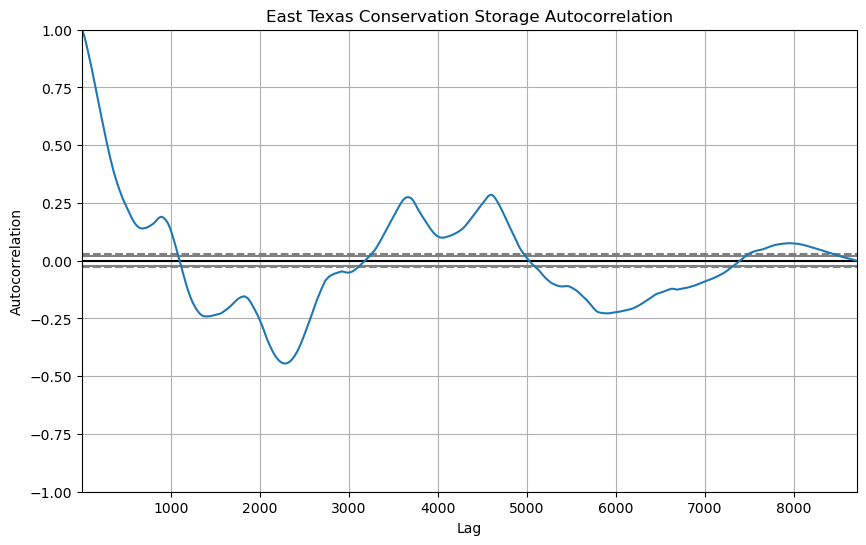

In [213]:
# autocorrelation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['conservation_storage'])
plt.title('East Texas Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

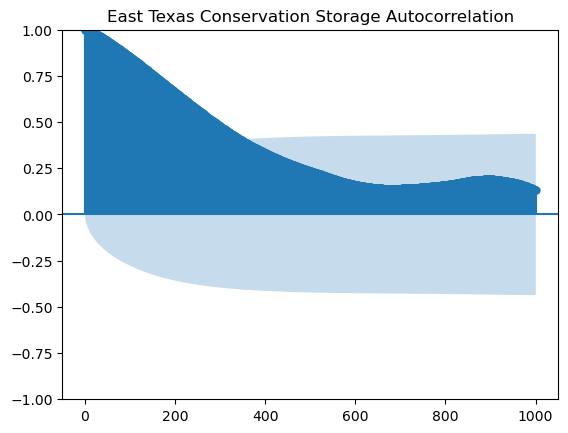

In [214]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(df['conservation_storage'], lags=1000)
plt.title('East Texas Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

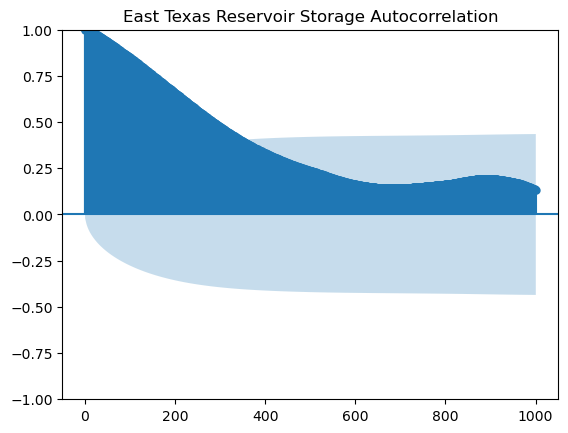

In [215]:
# acf plot of reservoir storage
plt.figure(figsize=(10, 6))
plot_acf(df['reservoir_storage'], lags=1000)
plt.title('East Texas Reservoir Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

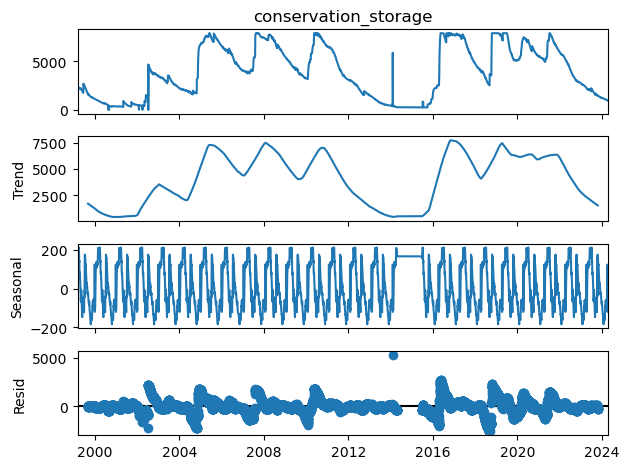

In [216]:
# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['conservation_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

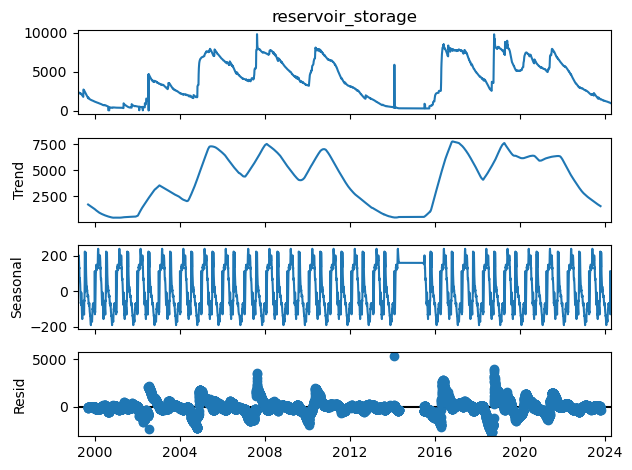

In [217]:
# seasonal decomposition for reservoir storage
decomposition = seasonal_decompose(df['reservoir_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

# Prediction Model

In [218]:
# create 50 columns for each lag
for i in range(1, 24):
    df[f'conservation_storage_{i}'] = df['conservation_storage'].shift(i)

# drop rows with NaN values
df.dropna(inplace=True)

In [219]:
df

,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_storage_1,conservation_storage_2,conservation_storage_3,conservation_storage_4,conservation_storage_5,conservation_storage_6,...,conservation_storage_14,conservation_storage_15,conservation_storage_16,conservation_storage_17,conservation_storage_18,conservation_storage_19,conservation_storage_20,conservation_storage_21,conservation_storage_22,conservation_storage_23
date,,,,,,,,,,,,,,,,,,,,,
1999-03-28,279.8,2311,2311,29.3,2260.0,2269.0,2272.0,2278.0,2284.0,2290.0,...,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0,2299.0,2308.0,2314.0
1999-03-29,279.8,2311,2311,29.3,2311.0,2260.0,2269.0,2272.0,2278.0,2284.0,...,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0,2299.0,2308.0
1999-03-30,279.5,2308,2308,29.2,2311.0,2311.0,2260.0,2269.0,2272.0,2278.0,...,2299.0,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0,2299.0
1999-03-31,279.2,2305,2305,29.2,2308.0,2311.0,2311.0,2260.0,2269.0,2272.0,...,2296.0,2299.0,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0,2299.0
1999-04-01,278.9,2302,2302,29.1,2305.0,2308.0,2311.0,2311.0,2260.0,2269.0,...,2293.0,2296.0,2299.0,2305.0,2317.0,2323.0,2287.0,2290.0,2293.0,2302.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19,167.0,922,922,11.7,930.0,933.0,940.0,944.0,947.0,952.0,...,994.0,1000.0,1005.0,1011.0,1013.0,1013.0,1016.0,1018.0,1023.0,1028.0
2024-04-20,167.8,928,928,11.7,922.0,930.0,933.0,940.0,944.0,947.0,...,987.0,994.0,1000.0,1005.0,1011.0,1013.0,1013.0,1016.0,1018.0,1023.0
2024-04-21,168.4,937,937,11.9,928.0,922.0,930.0,933.0,940.0,944.0,...,982.0,987.0,994.0,1000.0,1005.0,1011.0,1013.0,1013.0,1016.0,1018.0


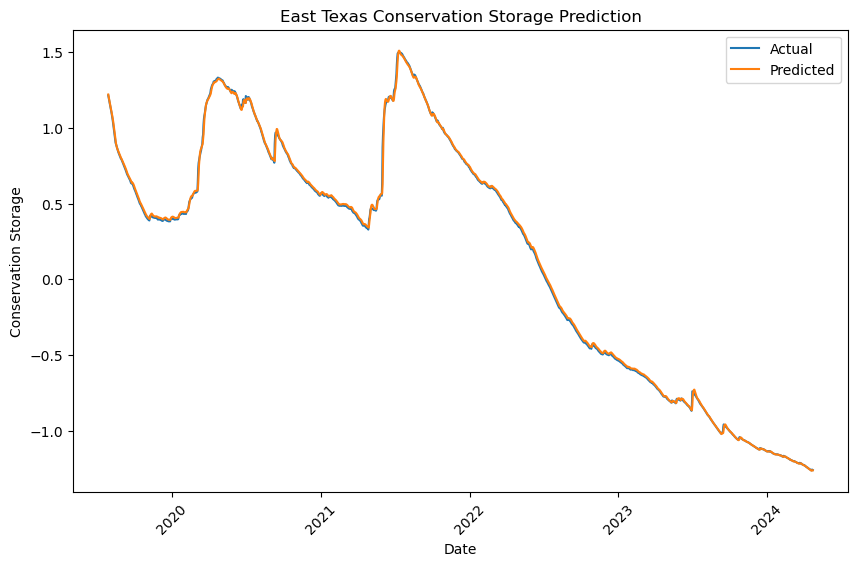

In [220]:
# create X and y, with X being the lag columns and y being the target column
X = df.drop(['conservation_storage', 'percent_full', 'reservoir_storage'], axis=1)
y = df['conservation_storage']

# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# split the data into training and testing sets and remain the time order
split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

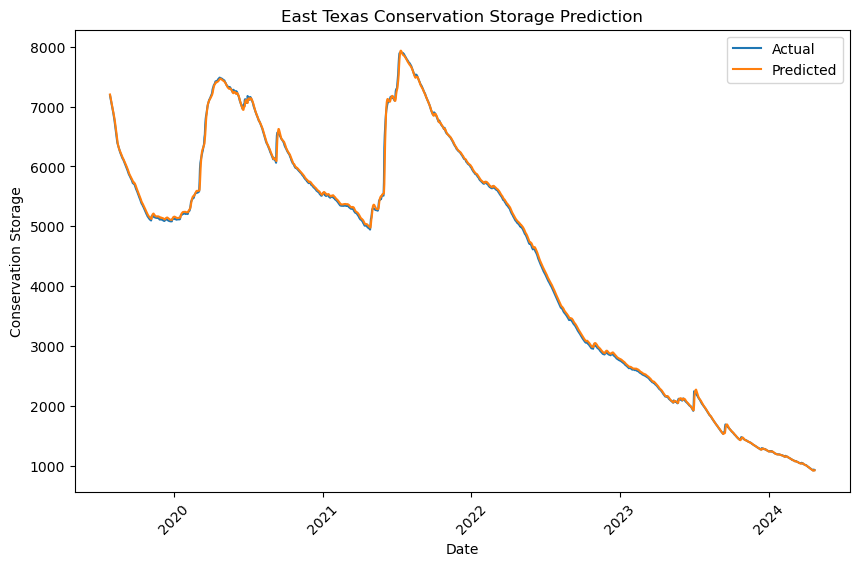

In [221]:
# convert the predictions back to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [222]:
# print mse, rmse, and r2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Mean Absolute Error: 23.412461387056798
Mean Squared Error: 1352.4502179659655
Root Mean Squared Error: 36.77567426935862
R^2: 0.9996812115823368


In [223]:
# convert the predictions to exact values
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# convert y_pred from number format of 1.23456789e+01 to 12.3456789
y_pred = np.array([float(f'{x:.2f}') for x in y_pred])

# display a dataframe with the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_pred.flatten().astype(float)})
df_pred

,actual,predicted
0,7189.0,7202.88
1,7149.0,7164.41
2,7114.0,7125.96
3,7079.0,7089.80
4,7044.0,7054.80
...,...,...
1727,922.0,922.29
1728,928.0,917.05
1729,937.0,918.71
1730,933.0,924.49


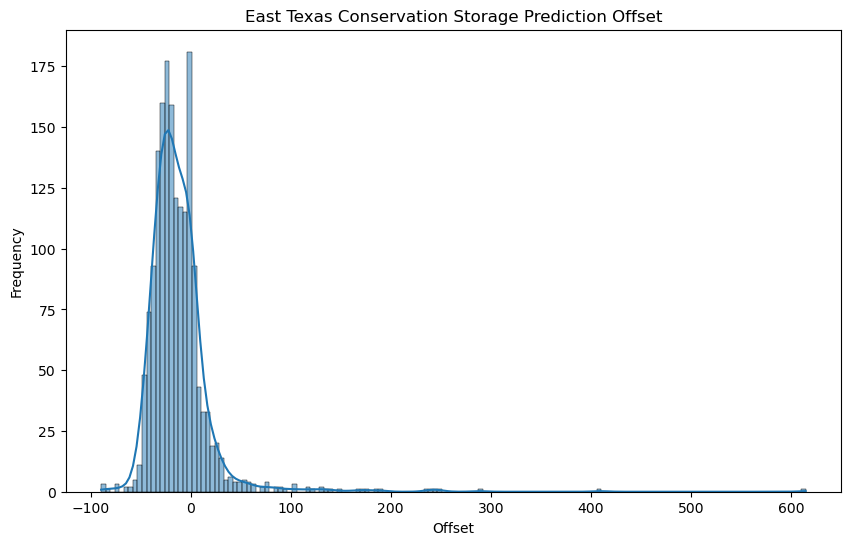

In [224]:
# plot offset between actual and predicted values in histogram
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('East Texas Conservation Storage Prediction Offset')
plt.xlabel('Offset')
plt.ylabel('Frequency')
plt.show()

In [225]:
# train with LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten

# reshape the data
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# create the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.add(Flatten())
model.compile(optimizer='adam', loss='mae')

# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# train the model
model.fit(X_train_reshaped, y_train, epochs=1000, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# make predictions
y_pred = model.predict(X_test_reshaped)

Epoch 1/1000


/Users/Khoi/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2488 - val_loss: 0.0604
Epoch 2/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 0.0303 - val_loss: 0.0455
Epoch 3/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0255 - val_loss: 0.0364
Epoch 4/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0205 - val_loss: 0.0289
Epoch 5/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.0206 - val_loss: 0.0259
Epoch 6/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.0153 - val_loss: 0.0236
Epoch 7/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.0154 - val_loss: 0.0194
Epoch 8/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.0136 - val_loss: 0.0231
Epoch 9/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.0121 - val_loss: 0.0153
Epoch 10/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.0129 - val_loss: 0.0177
Epoch 11/1000
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.0106 - val_loss: 0.0183
Epoch 12/1000
174/174 ━

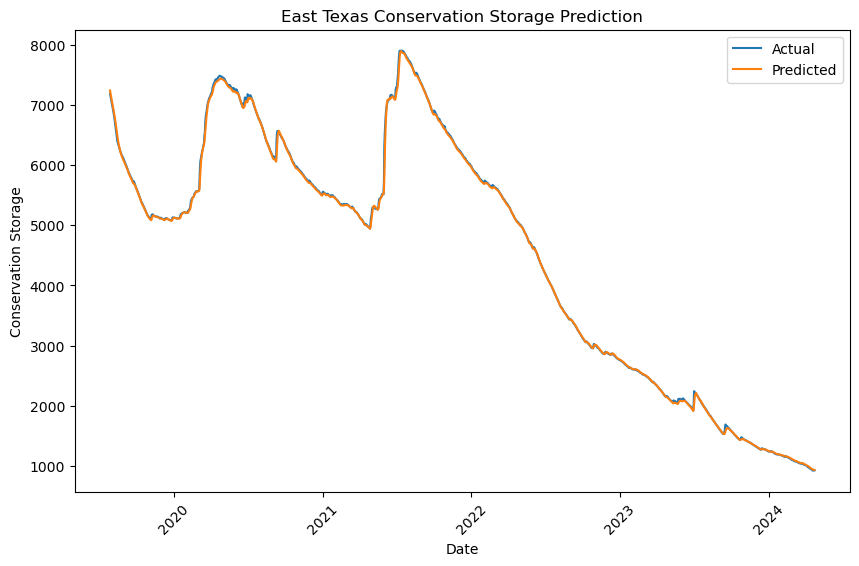

In [226]:
y_pred = scaler.inverse_transform(y_pred)
# y_test = scaler.inverse_transform(y_test.flatten().reshape(-1, 1))

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[split_index:], y_test, label='Actual')
plt.plot(df.index[split_index:], y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [227]:
# print mse, rmse, and r2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Mean Absolute Error: 2332.349534718846
Mean Squared Error: 1121.8634741153937
Root Mean Squared Error: 33.49423046011647
R^2: 0.9997355635889613
